In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
%matplotlib inline
import math

In [2]:
train_dir = 'D:\College\BE\BE PROJECT\Dataset'

In [3]:
#creating Image matrix lists
normal_imgs = [fn for fn in os.listdir(f'{train_dir}/No_findings') if fn.endswith('.jpeg') or fn.endswith('.png') or fn.endswith('.jpg')]
pneumo_imgs = [fn for fn in os.listdir(f'{train_dir}/Pneumonia') if fn.endswith('.jpeg') or fn.endswith('.png') or fn.endswith('.jpg')]
covid_imgs = [fn for fn in os.listdir(f'{train_dir}/Covid-19') if fn.endswith('.jpeg') or fn.endswith('.png') or fn.endswith('.jpg')]

D:\College\BE\BE PROJECT\Dataset/No_findings/Normal (177).png
D:\College\BE\BE PROJECT\Dataset/No_findings/Normal (76).png
D:\College\BE\BE PROJECT\Dataset/Pneumonia/Pneumonia (918).png
D:\College\BE\BE PROJECT\Dataset/Pneumonia/Pneumonia (794).png
D:\College\BE\BE PROJECT\Dataset/Covid-19/Covid (514).png
D:\College\BE\BE PROJECT\Dataset/Covid-19/Covid (360).png


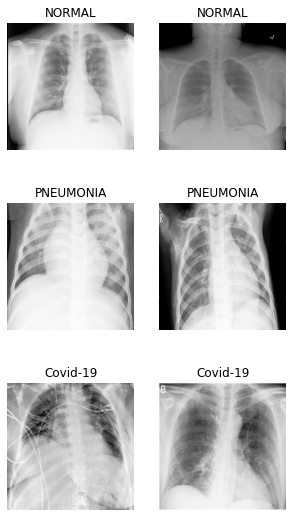

In [4]:
#selecting 6 random images from all three folders as example
select_norm = np.random.choice(normal_imgs, 2, replace = False)
select_pneu = np.random.choice(pneumo_imgs, 2, replace = False)
select_covi = np.random.choice(covid_imgs, 2, replace = False) 

fig = plt.figure(figsize = (5,16))
for i in range(6):
    if i < 2:
        fp = f'{train_dir}/No_findings/{select_norm[i]}'
        label = 'NORMAL'
    
    elif i < 4:
        fp = f'{train_dir}/Pneumonia/{select_pneu[i-2]}'
        label = 'PNEUMONIA'
    
    else:
        fp = f'{train_dir}/Covid-19/{select_covi[i-4]}'
        label = 'Covid-19'
    ax = fig.add_subplot(5, 2, i+1)

    print(fp)
    fn = image.load_img(fp, target_size = (300,300), color_mode='grayscale')
    plt.imshow(fn, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
plt.show()

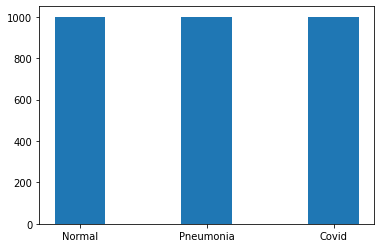

Normal : 1000 
Pneumonia : 1000 
Covid-19 : 1000


In [5]:
length=[len(normal_imgs),len(pneumo_imgs),len(covid_imgs)]
labels=['Normal','Pneumonia','Covid']
plt.bar(labels,length,width=0.4)
plt.show()
print('Normal :',len(normal_imgs),'\nPneumonia :' ,len(pneumo_imgs),'\nCovid-19 :' ,len(covid_imgs))

In [29]:
#converting all single image matrix in a single matrix consisting of all image pixel values(2d matrix of image)
def image_np(path,list_file_name,size=(64,64),colour_mode='grayscale'):
  for fn in list_file_name:
    fp = path + fn
    current_img = image.load_img(fp,color_mode=colour_mode,target_size=size)
    image_2darray = image.img_to_array(current_img)
    image_1darray = [image_2darray.ravel()]
    try:
      full_mat = np.concatenate((full_mat,image_1darray))
    except UnboundLocalError:
      full_mat=image_1darray
  return full_mat

#Finding the mean image
def find_mean(full_mat,title,size=(64,64)):
  mean_image = np.mean(full_mat,axis=0)
  mean_image = mean_image.reshape(size)
  plt.imshow(mean_image, vmin=0, vmax=255, cmap='Greys_r')
  plt.title(f'Average {title}')
  plt.axis('off')
  plt.show()
  return mean_image

def plot_mean(mean_image,title):
    plt.imshow(mean_image)
    plt.title(title)
    plt.axis('off')
    plt.show()

#Plotting the contrast image
def plot_contrast(mean_image_name,title):
  plt.imshow(mean_image_name, cmap='bwr')
  plt.title(title)
  plt.axis('off')
  plt.show() 

#Finding the standard deviation image
def find_std(full_mat,title,size=(64,64)):
  std_image = np.std(full_mat,axis=0)
  std_image = std_image.reshape(size)
  plot_std(std_image,title)
  return std_image

#Plotting STD image
def plot_std(std_image,title):
  plt.imshow(std_image, vmin=0, vmax=255, cmap='Greys_r')
  plt.title(f'STD {title}')
  plt.axis('off')
  plt.show()

In [19]:
#Calling image to numpy method
normal_images = image_np(f'{train_dir}/No_findings/',normal_imgs)
pneumonia_images = image_np(f'{train_dir}/Pneumonia/',pneumo_imgs)
covid_images = image_np(f'{train_dir}/Covid-19/',covid_imgs)

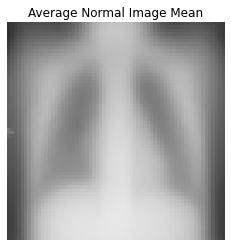

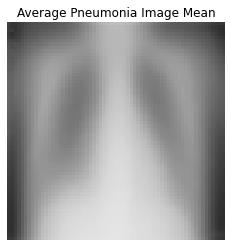

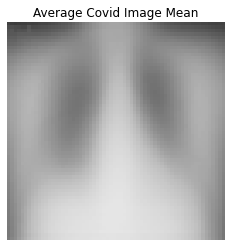

In [30]:
#calling mean image method 
normal_mean = find_mean(normal_images,'Normal Image Mean')
pneumonia_mean = find_mean(pneumonia_images,'Pneumonia Image Mean')
covid_mean = find_mean(covid_images,'Covid Image Mean')

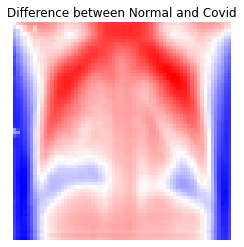

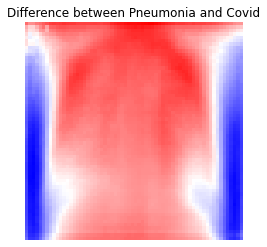

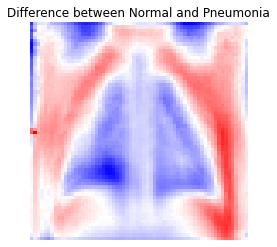

In [31]:
#Calculating contrast image 
contrast_mean_normal_covid = normal_mean - covid_mean
contrast_mean_pneu_covid = pneumonia_mean - covid_mean
contrast_mean_normal_pneu = normal_mean - pneumonia_mean
#calling contrast plotting method
plot_contrast(contrast_mean_normal_covid,'Difference between Normal and Covid')
plot_contrast(contrast_mean_pneu_covid,'Difference between Pneumonia and Covid')
plot_contrast(contrast_mean_normal_pneu,'Difference between Normal and Pneumonia')

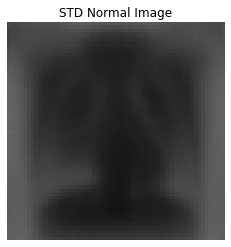

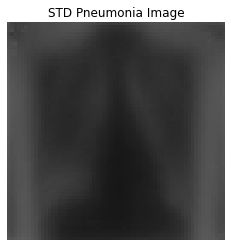

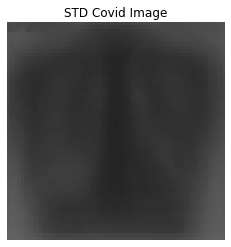

In [32]:
#calling Standard deviation method
normal_std = find_std(normal_images,'Normal Image')
pneumonia_std = find_std(pneumonia_images,'Pneumonia Image')
covid_std = find_std(covid_images,'Covid Image')